In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from celmech.hamiltonian import AndoyerHamiltonian

H = AndoyerHamiltonian(4,2,1.6,np.pi)
tmax=10
Nout = 1000
times = np.linspace(0, tmax, Nout)
sol = np.zeros((2, Nout))
for i, time in enumerate(times):
    H.integrate(time)
    sol[:,i] = list(H.integrator.y)

ax = plt.subplot('111', projection='polar')
ax.plot(sol[1,:], sol[0,:])

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/scipy/integrate/_ode.py:1213: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  'Unexpected istate=%s' % istate))


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from celmech.hamiltonian import AndoyerHamiltonian

H = AndoyerHamiltonian(4,2,1.6,np.pi)
H.integrate(0.1)

In [2]:
H.integrate(2)

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """
/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


<IPython.core.display.Javascript object>


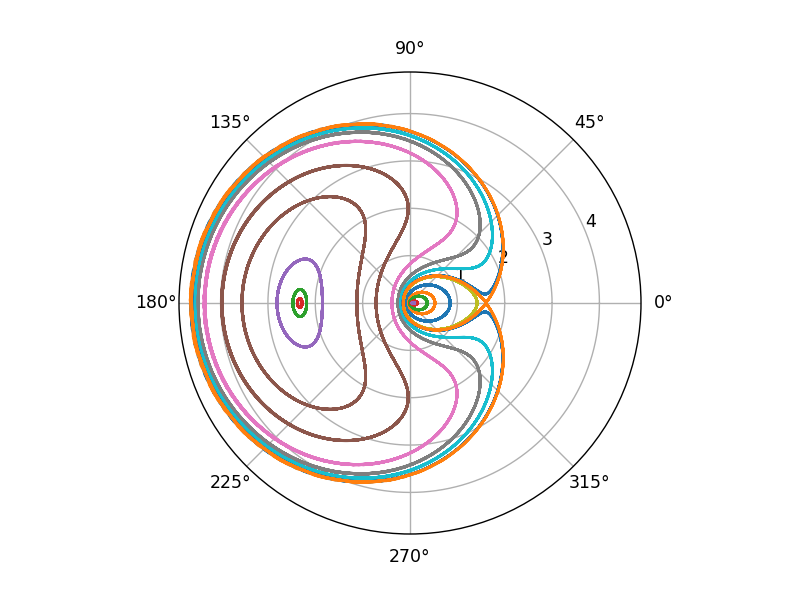

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from celmech.hamiltonian import AndoyerHamiltonian
import numpy as np

class Clicker(object):
    def __init__(self, k, Phiprime):
        self.ax = plt.subplot('111', projection='polar')
        self.k = k
        self.Phiprime = Phiprime
        self.cid = self.ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        phi = event.xdata
        Phi = event.ydata
        H = AndoyerHamiltonian(self.k,self.Phiprime,Phi,phi)
        tmax=100
        Nout = 1000
        times = np.linspace(0, tmax, Nout)
        sol = np.zeros((2, Nout))
        for i, time in enumerate(times):
            H.integrate(time)
            sol[:,i] = H.integrator.y
        self.ax.plot(sol[1,:], sol[0,:])

clicker = Clicker(1, 2)